In [2]:
#Importing all libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


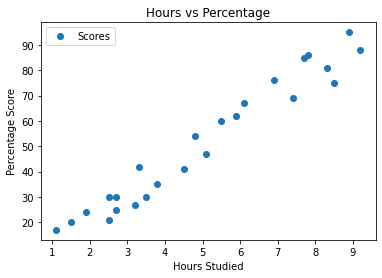

In [5]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Preparing Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = data.iloc[:, :-1].values #Selection of a particular set of dataset
y = data.iloc[:, :1].values

In [7]:
from sklearn.model_selection import train_test_split #Splits the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Train the algorithm

In [8]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


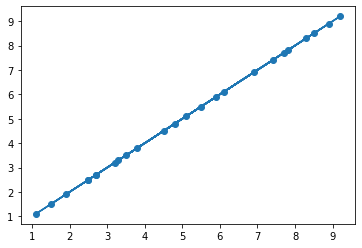

In [9]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


Making predictions

In [10]:
print(X_test) #Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame([{'Actual': y_test, 'Predicted': y_pred}])  
df 

,Actual,Predicted
0,"[[1.5], [3.2], [7.4], [2.5], [5.9]]","[[1.4999999999999996], [3.2], [7.4000000000000..."


In [13]:
# Testing with own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted score = [9.25]


In [14]:
from sklearn import metrics
print('Mean Absolute Errors:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Errors: 3.552713678800501e-16
